In [2]:
import torch
import torchvision

from pathlib import Path
import numpy as np
import xarray as xr


## Epoch testing code

The number of epochs required to train autoencoder models will be verified in this notebook. This requires a set dataset with a specific excluded validation set, and a specific model. Performance will be evaluated by training the model over 100 , 1000, 10000, and 20000 epochs to determine when overfitting happens (validation score >> train score). In addition, model performance also needs to be evaluated by examining the predicted profiles. 

In [5]:
# load datasets
data_dir = Path('/Users/jarl/2d-discharge-nn/data/image_datasets')
data_list = sorted(data_dir.rglob('*.npz'))

In [27]:
def plot_data(data):
    fig, ax = plt.subplots(ncols=5, sharey=True)
    for i in range(5):
        ax[i].imshow(data[i, :, :], origin='lower')

In [ ]:
def get_dataset(V, P):
    """Function to load data from a pair of V, P

    This is surprisingly easier than using netCDFs lmao.

    Args:
        V (int or float): voltage
        P (int or float): pressure

    Returns:
        np.array: Array with shape (5, 707, 200)
    """
    V = str(float(V))
    P = str(float(P))
    file = next(data_dir.glob(f'{V}_{P}.npz'))
    array = np.load(file)['arr_0']

    return array

In [25]:
test = get_dataset(300, 60)

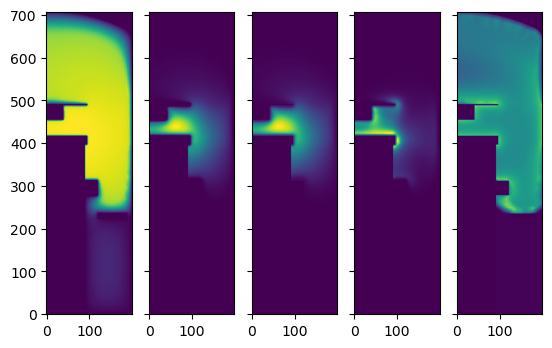

In [28]:
plot_data(test)

### To do:
* crop the images
* downscale images
* scale for each variable
* set up training loop function
* train, test, validation split
* plot train and validation error (I can probably just use the one in plot.py)
* plot images